In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import accuracy_score

# cross validation
from sklearn.model_selection import cross_val_score

In [5]:
df=pd.read_csv('HistoricalQuotes.csv')
df.head(20)

,Date,Close/Last,Volume,Open,High,Low
0,02/28/2020,$273.36,106721200,$257.26,$278.41,$256.37
1,02/27/2020,$273.52,80151380,$281.1,$286,$272.96
2,02/26/2020,$292.65,49678430,$286.53,$297.88,$286.5
3,02/25/2020,$288.08,57668360,$300.95,$302.53,$286.13
4,02/24/2020,$298.18,55548830,$297.26,$304.18,$289.23
5,02/21/2020,$313.05,32426420,$318.62,$320.45,$310.5
6,02/20/2020,$320.3,25141490,$322.63,$324.65,$318.21
7,02/19/2020,$323.62,23495990,$320,$324.57,$320
8,02/18/2020,$319,38190550,$315.36,$319.75,$314.61
9,02/14/2020,$324.95,20028450,$324.74,$325.98,$322.85


In [6]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')
print(f'Dimension of the dataset is {df.ndim}')

The dataset has 2518 rows and 6 columns
Dimension of the dataset is 2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         2518 non-null   object
 1    Close/Last  2518 non-null   object
 2    Volume      2518 non-null   int64 
 3    Open        2518 non-null   object
 4    High        2518 non-null   object
 5    Low         2518 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.2+ KB


In [8]:
missing_values = pd.DataFrame({'No of missing values': df.isnull().sum(),
                              '% of missing values': (df.isnull().sum()/df.shape[0])*100}
                             ).reset_index().rename(columns = {'index':'Name'})

missing_values

,Name,No of missing values,% of missing values
0,Date,0,0.0
1,Close/Last,0,0.0
2,Volume,0,0.0
3,Open,0,0.0
4,High,0,0.0
5,Low,0,0.0


In [9]:
df = df.rename(columns={' Close/Last':'Close', ' Volume':'Volume', ' Open': 'Open', ' High':'High', ' Low':'Low'})
df['Date'] = pd.to_datetime(df['Date'])
df['Close'] = df['Close'].str.replace('$', '').astype('float')
df['Open'] = df['Open'].str.replace('$', '').astype('float')
df['High'] = df['High'].str.replace('$', '').astype('float')
df['Low'] = df['Low'].str.replace('$', '').astype('float')

C:\Users\Praveen\AppData\Local\Temp\ipykernel_17176\329131032.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Close'] = df['Close'].str.replace('$', '').astype('float')
C:\Users\Praveen\AppData\Local\Temp\ipykernel_17176\329131032.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Open'] = df['Open'].str.replace('$', '').astype('float')
C:\Users\Praveen\AppData\Local\Temp\ipykernel_17176\329131032.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['High'] = df['High'].str.replace('$', '').astype('float')

In [21]:
df.describe(include='all')

C:\Users\Praveen\AppData\Local\Temp\ipykernel_17176\2884002236.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe(include='all')


,Date,Close,Volume,Open,High,Low
count,2518,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
unique,2518,NaN,NaN,NaN,NaN,NaN
top,2020-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN
first,2010-03-01 00:00:00,NaN,NaN,NaN,NaN,NaN
last,2020-02-28 00:00:00,NaN,NaN,NaN,NaN,NaN
mean,NaN,114.769522,7.258009e+07,114.728443,115.766415,113.690582
std,NaN,60.662405,5.663113e+07,60.546893,61.134456,60.085105
min,NaN,29.835700,1.136205e+07,29.392800,29.928600,28.464300
25%,NaN,66.822475,3.053026e+07,66.877150,67.475300,66.372950


In [23]:
df1=df.copy()

In [25]:
col_list = ['Close', 'Volume', 'Open', 'High', 'Low']
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
model=scaler.fit(df[col_list])
min_max_scaled_data=model.transform(df[col_list])

min_max_scaled_data_df=pd.DataFrame(min_max_scaled_data,columns=col_list)

min_max_scaled_data_df

,Close,Volume,Open,High,Low
0,0.818943,0.211402,0.771523,0.834050,0.772861
1,0.819481,0.152499,0.852242,0.859527,0.829120
2,0.883813,0.084944,0.870627,0.899403,0.875036
3,0.868444,0.102656,0.919451,0.915011,0.873782
4,0.902409,0.097958,0.906957,0.920550,0.884294
...,...,...,...,...,...
2513,0.004852,0.472832,0.004445,0.004891,0.007451
2514,0.000894,0.173428,0.001707,0.000681,0.004544
2515,0.000231,0.180643,0.001543,0.000177,0.004210
2516,0.000000,0.288472,0.002022,0.000638,0.004113


### Base Model 

In [26]:
x = min_max_scaled_data_df.drop('Close', axis=1)
y = min_max_scaled_data_df['Close']

In [28]:
# splitting the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 42)

In [29]:
lm = LinearRegression()
lm.fit(x_train, y_train)
y_pred = lm.predict(x_test)

In [32]:
pred_train=lm.predict(x_train)


In [34]:
from sklearn.metrics import r2_score,mean_squared_error

In [35]:
r2_train=r2_score(y_train,pred_train)
r2_test=r2_score(y_test,y_pred)

In [36]:
r2_train

0.9998660443828733

In [37]:
 r2_test

0.9998688029646945

In [30]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 0.0015304267205748197
MSE: 4.808658901751831e-06
RMSE: 0.002192865454548416


In [38]:
import statsmodels.api as sma

In [39]:
sma.add_constant(x_train)

,const,Volume,Open,High,Low
1908,1.0,0.198622,0.178608,0.180455,0.180380
1996,1.0,0.320354,0.189622,0.189407,0.191977
765,1.0,0.025778,0.351069,0.348721,0.353648
1650,1.0,0.116560,0.124844,0.122084,0.125327
931,1.0,0.044094,0.227045,0.227649,0.229261
...,...,...,...,...,...
1638,1.0,0.157383,0.142689,0.144189,0.145940
1095,1.0,0.068535,0.286467,0.287497,0.289047
1130,1.0,0.144542,0.273431,0.275077,0.267547
1294,1.0,0.063451,0.263443,0.262725,0.265292


In [40]:
t_train=sma.add_constant(x_train)
t_test=sma.add_constant(x_test)

In [41]:
t_train.shape

(1762, 5)

In [42]:
t_test.shape

(756, 5)

In [43]:
t_train.describe().T

,count,mean,std,min,25%,50%,75%,max
const,1762.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
Volume,1762.0,0.133966,0.124585,0.000000,0.041966,0.089021,0.192658,1.0
Open,1762.0,0.290873,0.210272,0.001707,0.122378,0.242485,0.425253,1.0
High,1762.0,0.290084,0.210494,0.000681,0.121634,0.242283,0.422960,1.0
Low,1762.0,0.290969,0.208903,0.000000,0.123518,0.243995,0.424082,1.0


In [45]:
model=sma.OLS(y_train,t_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.279e+06
Date:                Wed, 25 Sep 2024   Prob (F-statistic):               0.00
Time:                        17:18:49   Log-Likelihood:                 8114.3
No. Observations:                1762   AIC:                        -1.622e+04
Df Residuals:                    1757   BIC:                        -1.619e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0026      0.000    -13.175      0.000      -0.003      -0.002
Volume         0.0007      0.001      1.073      0.283      -0.001       0.002
Open          -0.5638      0.018    -30.555      0.000      -0.600      -0.528
High           0.7741      0.017     45.898      0.000       0.741       0.807
Low            0.7888      0.016     50.844      0.000       0.758       0.819
==============================================================================
Omnibus:                      460.758   Durbin-Watson:                   2.074
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            14631.304
Skew:                           0.555   Prob(JB):                         0.00
Kurtosis:                      17.073   Cond. No.                         451.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Time series analysis 

In [11]:
print("Data Period :", df['Date'].min(), "To", df['Date'].max())

Data Period : 2010-03-01 00:00:00 To 2020-02-28 00:00:00


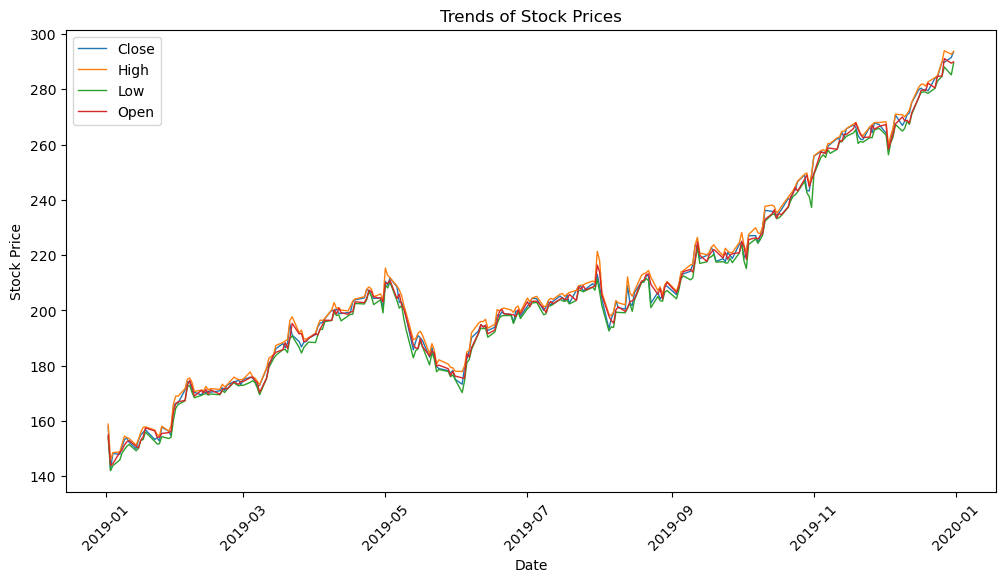

In [18]:
plt.figure(figsize=(12, 6))

df_2019 = df[df['Date'].dt.year == 2019]
sns.lineplot(x='Date', y='Close', data=df_2019, label='Close', linewidth=1)
sns.lineplot(x='Date', y='High', data=df_2019, label='High', linewidth=1)
sns.lineplot(x='Date', y='Low', data=df_2019, label='Low', linewidth=1)
sns.lineplot(x='Date', y='Open', data=df_2019, label='Open', linewidth=1)

plt.title('Trends of Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()

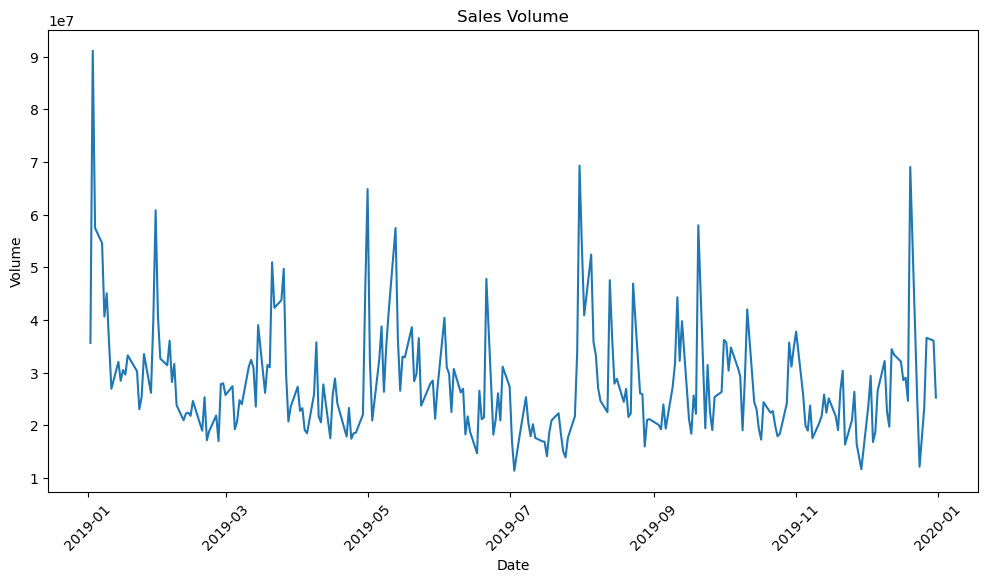

In [17]:
plt.figure(figsize=(12, 6)) 
sns.lineplot(x='Date', y='Volume', data=df_2019)
plt.title('Sales Volume')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.xticks(rotation=45)  
plt.show()

C:\Users\Praveen\AppData\Local\Temp\ipykernel_17176\3637862922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019[column_name] = df_2019['Close'].rolling(ma).mean()
C:\Users\Praveen\AppData\Local\Temp\ipykernel_17176\3637862922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2019[column_name] = df_2019['Close'].rolling(ma).mean()
C:\Users\Praveen\AppData\Local\Temp\ipykernel_17176\3637862922.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

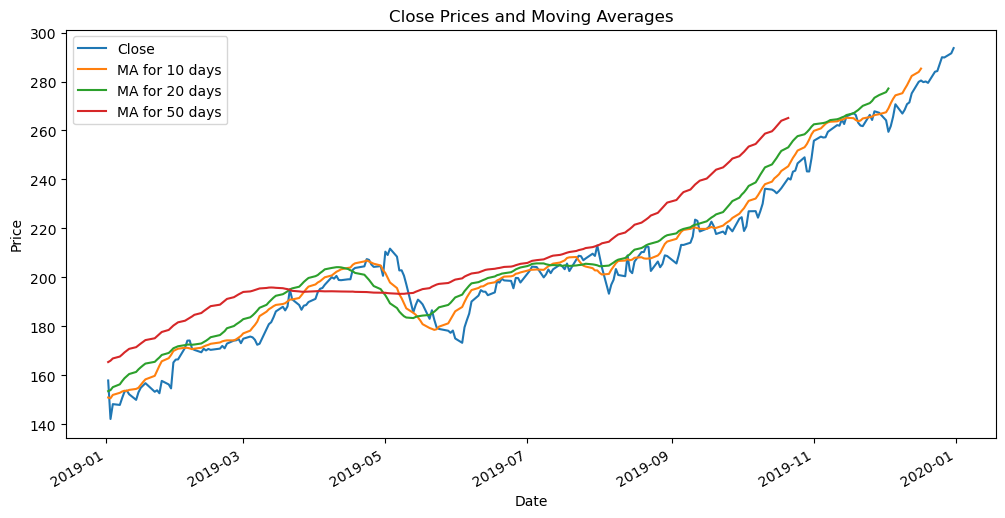

In [19]:
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df_2019[column_name] = df_2019['Close'].rolling(ma).mean()

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
df_2019[['Date', 'Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(x='Date', ax=axes)
axes.set_title('Close Prices and Moving Averages')
axes.set_xlabel('Date')
axes.set_ylabel('Price')
axes.legend()
plt.show()

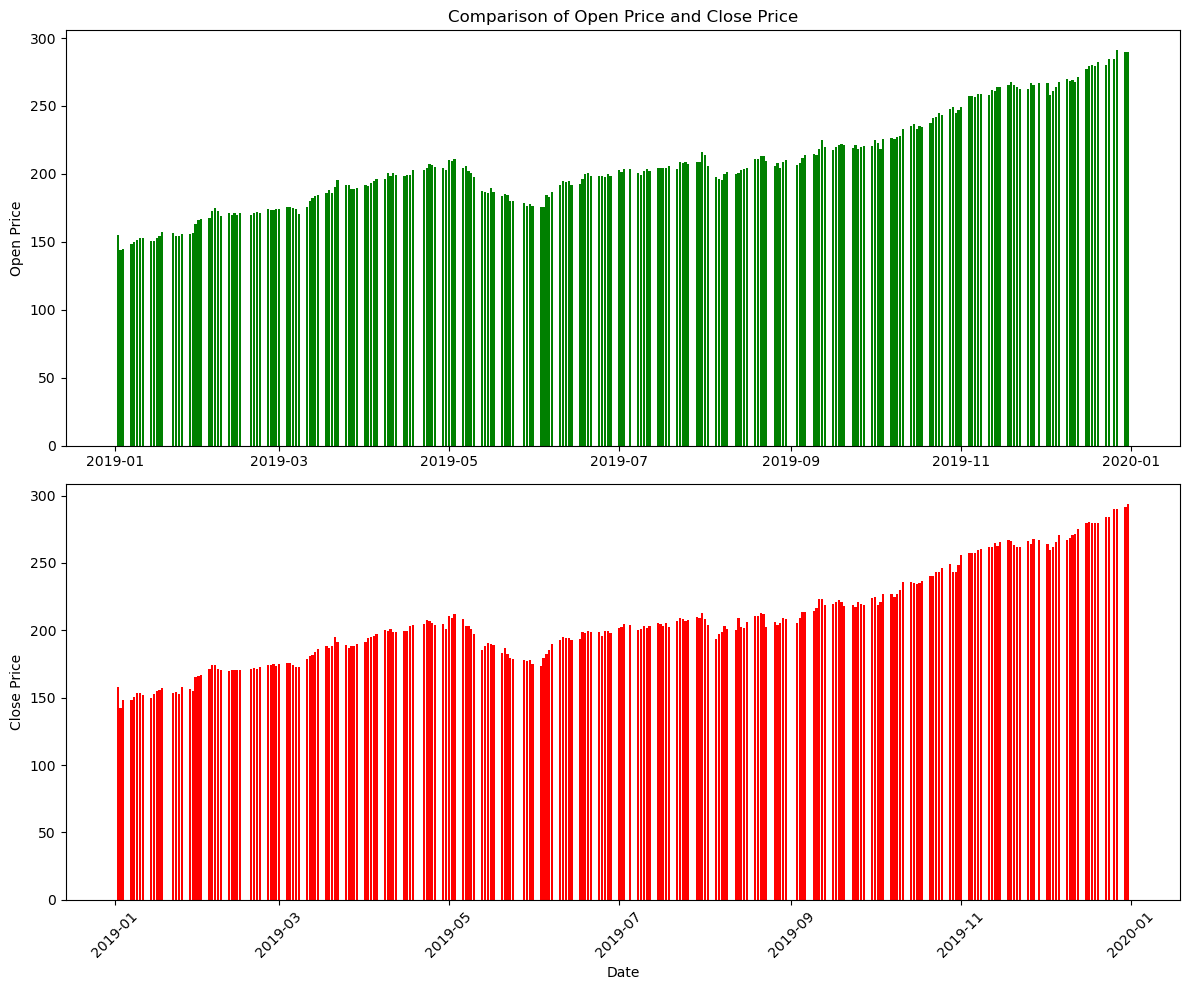

In [20]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

axes[0].bar(df_2019['Date'], df_2019['Open'], color='green', label='Open Price')
axes[0].set_ylabel('Open Price')
axes[0].set_xlabel(None)
axes[0].set_title('Comparison of Open Price and Close Price')

axes[1].bar(df_2019['Date'], df_2019['Close'], color='red', label='Close Price')
axes[1].set_ylabel('Close Price')
axes[1].set_xlabel('Date')
axes[1].tick_params(axis='x', rotation=45)  

fig.tight_layout()
plt.show()

In [46]:
df1.head()

,Date,Close,Volume,Open,High,Low
0,2020-02-28,273.36,106721200,257.26,278.41,256.37
1,2020-02-27,273.52,80151380,281.10,286.00,272.96
2,2020-02-26,292.65,49678430,286.53,297.88,286.50
3,2020-02-25,288.08,57668360,300.95,302.53,286.13
4,2020-02-24,298.18,55548830,297.26,304.18,289.23


In [47]:
data = df1.filter(['Close'])
dataset = data.values
training_data_len = int(np.ceil(len(dataset) * 0.95))
training_data_len

2393

In [48]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

In [49]:
training_data_len = int(np.ceil(len(dataset) * 0.95))
x_train = []
y_train = scaled_data[60:training_data_len, 0]

for i in range(60, len(scaled_data[60:training_data_len])):
    x_train.append(scaled_data[i-60:i, 0])

x_train = np.array(x_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [50]:
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

### Neural Network Model

In [51]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))  
model.add(LSTM(64, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(25, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model.fit(x_train, y_train, batch_size=32, epochs=50, validation_split=0.1, callbacks=[early_stopping])

Epoch 1/50


C:\Users\Praveen\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


64/64 ━━━━━━━━━━━━━━━━━━━━ 5s 42ms/step - loss: 0.0216 - val_loss: 1.4145e-04
Epoch 2/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 0.0011 - val_loss: 3.2152e-05
Epoch 3/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 9.4589e-04 - val_loss: 7.4004e-05
Epoch 4/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.5014e-04 - val_loss: 4.5313e-05
Epoch 5/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 7.2605e-04 - val_loss: 1.3070e-04
Epoch 6/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 7.7567e-04 - val_loss: 4.8643e-05
Epoch 7/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 8.1891e-04 - val_loss: 6.1762e-05
Epoch 8/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - loss: 5.6310e-04 - val_loss: 4.7216e-05
Epoch 9/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 5.5279e-04 - val_loss: 3.2728e-05
Epoch 10/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.1563e-04 - val_loss: 8.0090e-05
Epoch 11/50
64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 5.5274e-04 - val_loss: 4.539

In [52]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
y_test = scaler.inverse_transform(y_test)

mae = mean_absolute_error(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

text = f"""{'METRICS'.center(46)}
{'_'*46}
{'='*20} MAE {'='*20}
MAE Value\t\t: {mae}
{'_'*46}
{'='*20} MAPE {'='*20}
Mape value\t\t: {mape}
{'_'*46}
{'='*20} RMSE {'='*20}
RMSE value\t\t: {rmse}
{'_'*46}
"""

print(text)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 91ms/step
                   METRICS                    
______________________________________________
==================== MAE ====================
MAE Value		: 10563.15697482356
______________________________________________
==================== MAPE ====================
Mape value		: 0.9965269144411336
______________________________________________
==================== RMSE ====================
RMSE value		: 10582.307715160965
______________________________________________



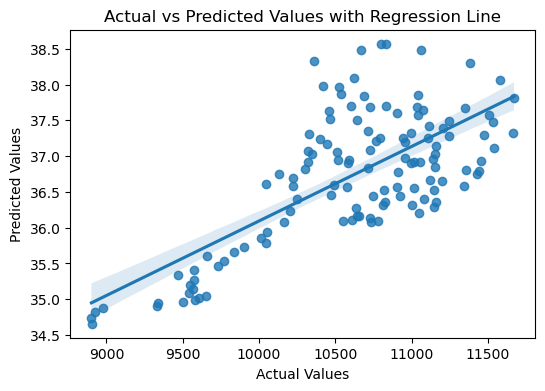

In [53]:
result_df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': predictions.flatten()})

# Regression plot
plt.figure(figsize=(6, 4))
sns.regplot(x='Actual', y='Predicted', data=result_df)
plt.title('Actual vs Predicted Values with Regression Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

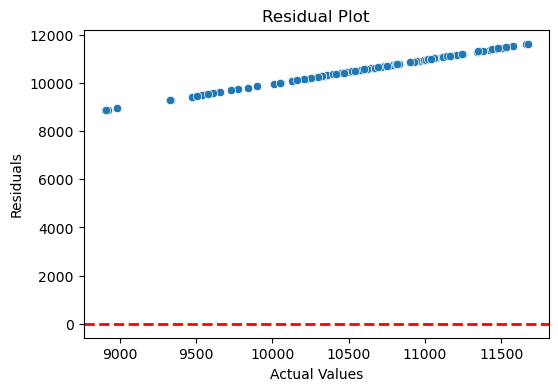

In [54]:
result_df['Residuals'] = result_df['Actual'] - result_df['Predicted']

# Residual plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Actual', y='Residuals', data=result_df)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2) 
plt.title('Residual Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')
plt.show()

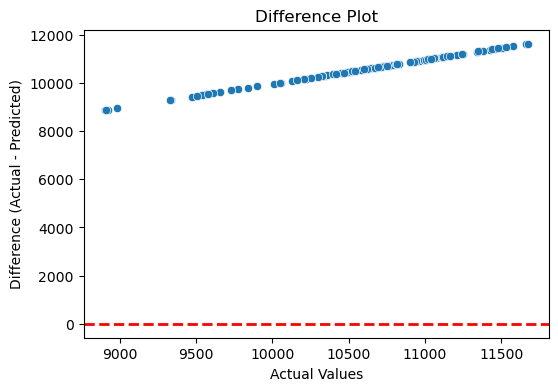

In [55]:
result_df['Difference'] = result_df['Actual'] - result_df['Predicted']

# Difference plot
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Actual', y='Difference', data=result_df)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Difference Plot')
plt.xlabel('Actual Values')
plt.ylabel('Difference (Actual - Predicted)')
plt.show()